# COURSE: A deep understanding of deep learning
## SECTION: FFNs
### LECTURE: CodeChallenge: Binarized MNIST images
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [1]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Import and process the data

In [2]:
# import dataset (comes with colab!)
# data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

# import dataset from torchvision
import torchvision.datasets as datasets
mnist_train = datasets.MNIST(root='./data', train=True, download=True)
mnist_test = datasets.MNIST(root='./data', train=False, download=True)

train_data = mnist_train.data
train_labels = mnist_train.targets
test_data = mnist_test.data
test_labels = mnist_test.targets

# reshape data to 2D tensor
train_data = train_data.reshape(-1, 28*28).float()
test_data = test_data.reshape(-1, 28*28).float()

labels = torch.cat((train_labels, test_labels), dim=0)
data = torch.cat((train_data, test_data), dim=0)

# extract labels (number IDs) and remove from data
# labels = data[:,0]
# data   = data[:,1:]

dataNorm = data / np.max(data.numpy())

dataBin = torch.where(dataNorm < 0.5, torch.floor(dataNorm), torch.ceil(dataNorm)).int()

print(dataBin[0])

labelsPy = labels.numpy()
dataPy = dataBin.numpy()

print(dataNorm.shape)
print(labels.shape)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

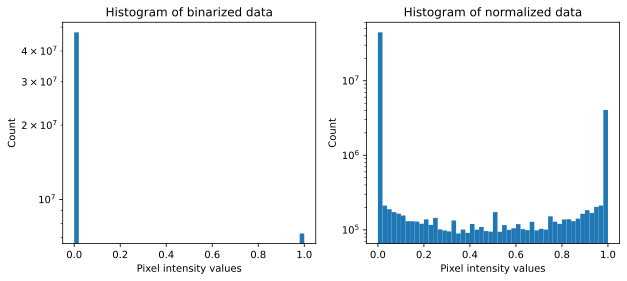

In [3]:
# The issue with the previous graph is that we have a lot of data with 0 or 256 intensity
# So we are going to put a log scale so we can see it better.
# It's an scale issue, not a normalization issue.

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].hist(dataPy.flatten(),50)
ax[0].set_xlabel('Pixel intensity values')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of binarized data')
ax[0].set_yscale('log')

ax[1].hist(dataNorm.flatten(),50)
ax[1].set_xlabel('Pixel intensity values')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of normalized data')
ax[1].set_yscale('log')

plt.show()

# Create train/test groups using DataLoader

In [4]:
# Step 1: convert to tensor
dataBin = dataBin.clone().detach().float()
labels = labels.clone().detach().long()

print(dataBin.shape)
print(labels.shape)
print(dataBin[0].type())
print(labels[0].type())

# Step 2: use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataBin, labels, test_size=.1)


# Step 3: convert into PyTorch Datasets
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

# Step 4: translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

torch.Size([70000, 784])
torch.Size([70000])
torch.FloatTensor
torch.LongTensor


In [5]:
# check all variables in workspace
%whos

Variable            Type             Data/Info
----------------------------------------------
DataLoader          type             <class 'torch.utils.data.dataloader.DataLoader'>
F                   module           <module 'torch.nn.functio<...>/torch/nn/functional.py'>
TensorDataset       type             <class 'torch.utils.data.dataset.TensorDataset'>
ax                  ndarray          2: 2 elems, type `object`, 16 bytes
batchsize           int              32
data                Tensor           tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
dataBin             Tensor           tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
dataNorm            Tensor           tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
dataPy              ndarray          70000x784: 54880000 elems, type `int32`, 219520000 bytes (209.3505859375 Mb)
datasets            module           <module 'torchvision.data<...>on/datasets/__init__.py'>
fig                 Figure           Figur

# Create the DL model

In [6]:
# create a class for the model
def createTheMNISTNet():

  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,64)
      
      ### hidden layer
      self.fc1 = nn.Linear(64,32)
      self.fc2 = nn.Linear(32,32)

      ### output layer
      self.output = nn.Linear(32,10)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return torch.log_softmax( self.output(x),axis=1 )
      # NEW HERE: log-softmax the output, because I'm using NLLLoss instead of CrossEntropyLoss
  
  # create the model instance
  net = mnistNet()
  
  # loss function
  lossfun = nn.NLLLoss()

  # optimizer
  # Adam is so good, that we can't study the problem correctly if we use it
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

In [7]:
# test the model with one batch
net,lossfun,optimizer = createTheMNISTNet()

X,y = next(iter(train_loader))
print(X.shape)
yHat = net(X)

print(yHat.shape)
print(torch.exp(yHat)) # values are log-probability of each number (0-9)

# now let's compute the loss
loss = lossfun(yHat,y)
print(' ')
print('Loss:')
print(loss)

torch.Size([32, 784])
torch.Size([32, 10])
tensor([[0.1012, 0.1032, 0.1058, 0.0801, 0.0918, 0.1206, 0.1096, 0.1044, 0.0977,
         0.0856],
        [0.1002, 0.1025, 0.1076, 0.0777, 0.0919, 0.1197, 0.1075, 0.1070, 0.0979,
         0.0879],
        [0.1008, 0.1029, 0.1041, 0.0788, 0.0916, 0.1208, 0.1092, 0.1049, 0.1002,
         0.0865],
        [0.1008, 0.1032, 0.1040, 0.0789, 0.0899, 0.1232, 0.1102, 0.1040, 0.1002,
         0.0856],
        [0.1022, 0.1031, 0.1045, 0.0784, 0.0920, 0.1218, 0.1090, 0.1043, 0.0981,
         0.0866],
        [0.1010, 0.1035, 0.1053, 0.0796, 0.0907, 0.1212, 0.1101, 0.1041, 0.0981,
         0.0864],
        [0.1009, 0.1032, 0.1056, 0.0789, 0.0914, 0.1213, 0.1090, 0.1041, 0.0986,
         0.0868],
        [0.1015, 0.1034, 0.1064, 0.0776, 0.0919, 0.1203, 0.1107, 0.1032, 0.0974,
         0.0876],
        [0.1000, 0.1033, 0.1082, 0.0781, 0.0911, 0.1212, 0.1080, 0.1049, 0.0979,
         0.0873],
        [0.1002, 0.1035, 0.1040, 0.0795, 0.0902, 0.1222, 0.1114, 0

# Create a function that trains the model

In [8]:
# a function that trains the model

def function2trainTheModel():

  # number of epochs
  numepochs = 60
  
  # create a new model
  net,lossfun,optimizer = createTheMNISTNet()

  # initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )

  # end epochs

  # function output
  return trainAcc,testAcc,losses,net


# Run the model and show the results!

In [9]:
trainAcc,testAcc,losses,net = function2trainTheModel()


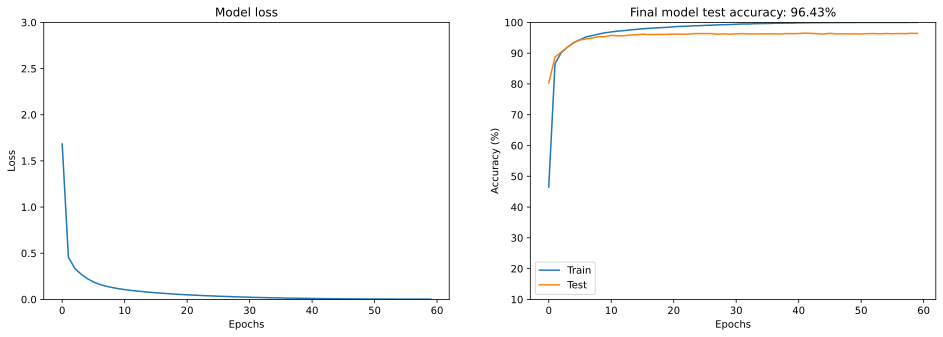

In [10]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

# Inspect the results in more detail

In [11]:
# run the model through for the test data
X,y = next(iter(test_loader))
predictions = net(X).detach()

print(predictions)
print(torch.exp(predictions))

tensor([[-2.9770e+01, -2.4481e+01, -2.7218e+01,  ..., -1.3443e+01,
         -2.2320e+01, -7.3907e-05],
        [-5.3654e+01,  0.0000e+00, -3.1674e+01,  ..., -2.9755e+01,
         -2.2209e+01, -4.7026e+01],
        [-6.1636e+01, -4.4901e+01, -5.4336e+01,  ..., -4.6997e+01,
         -2.7797e+01, -1.6957e+01],
        ...,
        [-2.8501e+01, -4.1723e-06, -1.2964e+01,  ..., -1.3288e+01,
         -1.6075e+01, -3.1217e+01],
        [-6.2241e+01, -4.9791e+01, -4.8160e+01,  ..., -5.8978e+01,
         -3.5173e+01, -3.3103e+01],
        [-2.3662e+01, -3.3909e+01, -2.6718e+01,  ..., -4.4075e+01,
          0.0000e+00, -3.0404e+01]])
tensor([[1.1778e-13, 2.3331e-11, 1.5117e-12,  ..., 1.4518e-06, 2.0256e-10,
         9.9993e-01],
        [4.9955e-24, 1.0000e+00, 1.7551e-14,  ..., 1.1952e-13, 2.2643e-10,
         3.7730e-21],
        [1.7057e-27, 3.1601e-20, 2.5251e-24,  ..., 3.8848e-21, 8.4724e-13,
         4.3219e-08],
        ...,
        [4.1900e-13, 1.0000e+00, 2.3420e-06,  ..., 1.6939e-06, 1

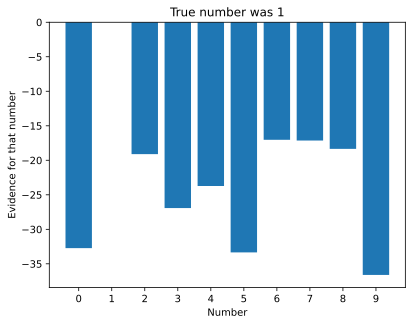

In [12]:
# Evidence for all numbers from one sample
sample2show = 120

plt.bar(range(10),predictions[sample2show]) # try adding exp!
plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.title('True number was %s' %y[sample2show].item())
plt.show()

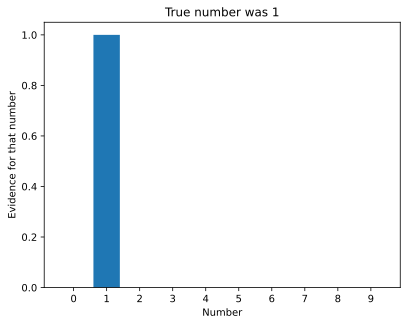

In [13]:
plt.bar(range(10),torch.exp(predictions[sample2show])) # try adding exp!
plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.title('True number was %s' %y[sample2show].item())
plt.show()

[  29   30   48   54  110  114  124  151  157  160  219  251  306  337
  350  363  430  433  444  469  475  498  506  518  577  579  595  717
  734  843  847  860  890  891  905  933  961  968  972  992 1143 1196
 1213 1253 1359 1361 1389 1395 1408 1493 1499 1512 1518 1565 1584 1586
 1632 1700 1723 1741 1742 1777 1798 1840 1866 1881 1925 1962 1969 2055
 2059 2067 2104 2118 2144 2146 2147 2155 2163 2166 2177 2178 2180 2181
 2220 2235 2247 2265 2289 2367 2371 2428 2467 2502 2509 2532 2547 2709
 2740 2761 2770 2813 2815 2820 2821 2841 2932 2950 2951 2963 2988 3005
 3124 3225 3288 3295 3322 3339 3377 3401 3412 3419 3493 3506 3513 3550
 3611 3658 3722 3736 3769 3876 3886 3907 3941 4025 4105 4127 4128 4186
 4195 4234 4268 4383 4399 4420 4423 4443 4452 4463 4504 4537 4563 4599
 4618 4623 4640 4796 4806 4820 4846 4884 4934 4962 4964 4973 5036 5047
 5090 5119 5163 5203 5244 5245 5252 5307 5317 5380 5424 5428 5441 5474
 5506 5528 5552 5581 5611 5641 5655 5661 5747 5756 5781 5819 5824 5872
 5880 

/tmp/ipykernel_576119/2747607007.py:10: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[0].bar(range(10),np.exp(predictions[errors[sample2show]]))


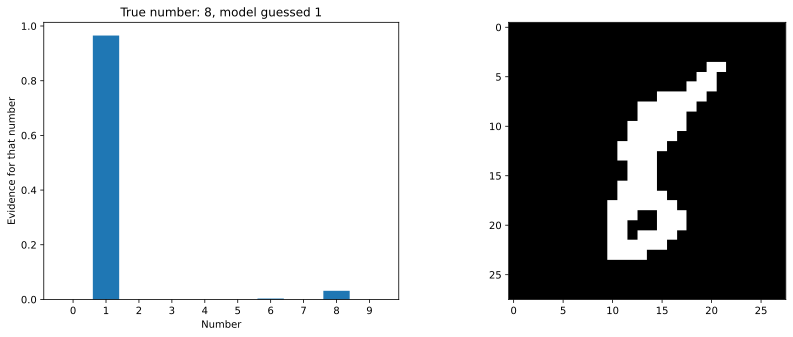

In [14]:
# find the errors
errors = np.where( torch.max(predictions,axis=1)[1] != y )[0]
print(errors)

# Evidence for all numbers from one sample
sample2show = 10

fig,ax = plt.subplots(1,2,figsize=(14,5))

ax[0].bar(range(10),np.exp(predictions[errors[sample2show]]))
ax[0].set_xticks(range(10))
ax[0].set_xlabel('Number')
ax[0].set_ylabel('Evidence for that number')
ax[0].set_title('True number: %s, model guessed %s' 
                %( y[errors[sample2show]].item(), torch.argmax(predictions[errors[sample2show]]).item() ))

ax[1].imshow( np.reshape(X[errors[sample2show],:],(28,28)) ,cmap='gray')

plt.show()

# Additional explorations

In [15]:
# 1) Average together the correct 7's and the error 7's, and make images of them (that is, one image
#    of all correct 7's and one image of all incorrectly labeled 7's). How do they look?
# 
# 2) Repeat #1 for all numbers to produce a 2x10 matrix of images with corrects on top
#    and errors on the bottom.
# 
# 3) Identify "almost errors," which we can define as correct categorizations that had a probability of
#    e.g., >.1 for any other number. Make images of some of these numbers. Can you understand why the model
#    was confused?
# 
# 4) I didn't use .train(), .eval(), or no_grad() here. Is that a problem? Can you add those in without checking
#    other notebooks?
# 